# Лабораторна робота №6: Застосування numpy
### *виконала студентка групи ФБ-33 Журавльова Марія*

**Мета роботи:** отримати поглиблені навички роботи з numpy; дослідити поняття лінійної регресії та градієнтного спуску.


In [89]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("Setup Complete")

Setup Complete


**Завдання 1:**
1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу результатів.
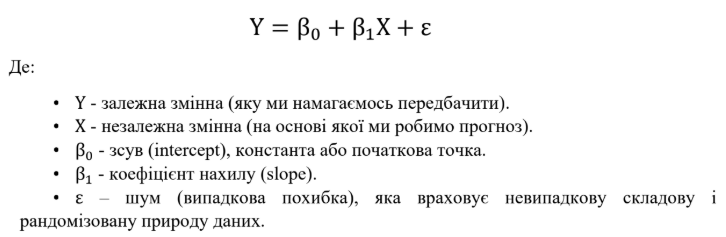

Коефіцієнт зсуву (b0) : 7
Коефіцієнт нахилу (b1) : 8


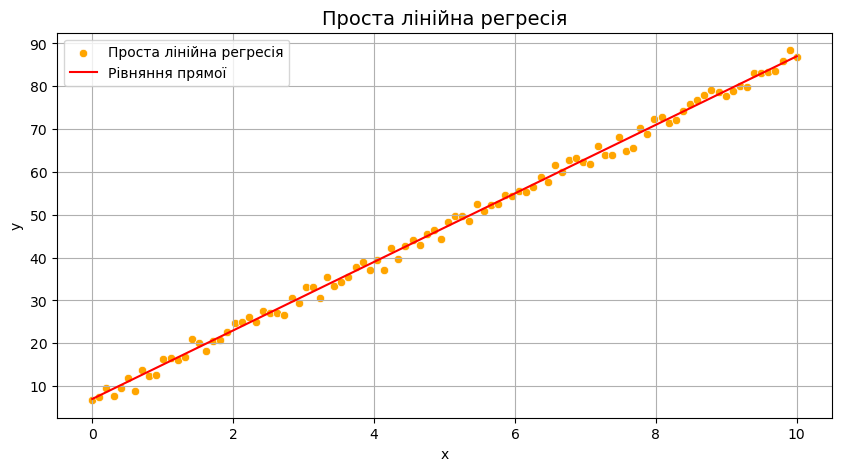

In [38]:
b0 = np.random.randint(0, 10)
b1 = np.random.randint(1, 10)
x = np.linspace(0, 10, 100)
e = np.random.normal(0, 1.5, 100)

y_e = b0 + b1 * x + e
y = b1 * x + b0

print(f"Коефіцієнт зсуву (b0) : {b0}")
print(f"Коефіцієнт нахилу (b1) : {b1}")

plt.figure(figsize=(10, 5))
plt.title('Проста лінійна регресія', fontsize=14)
sns.scatterplot(x=x, y=y_e, label="Проста лінійна регресія", color="orange")
sns.lineplot(x=x, y=y, label="Рівняння прямої", color="red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних оцінок k та b.
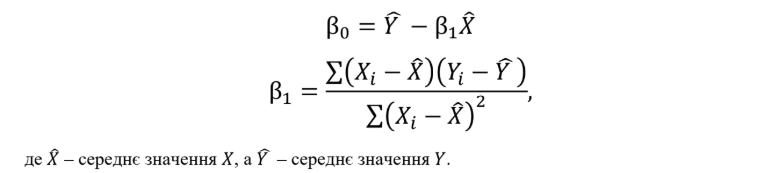

In [39]:
def least_squeres(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    b1_opt = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
    b0_opt = y_mean - b1_opt * x_mean
    return b0_opt, b1_opt

b0_opt, b1_opt = least_squeres(x, y_e)
print(f"Коефіцієнт зсуву (b0) : {b0}")
print(f"Коефіцієнт нахилу (b1) : {b1}")
print(f"Оптимальний коефіцієнт зсуву (b0_opt) : {b0_opt}")
print(f"Оптимальна коефіцієнт нахилу (b1_opt) : {b1_opt}")

Коефіцієнт зсуву (b0) : 7
Коефіцієнт нахилу (b1) : 8
Оптимальний коефіцієнт зсуву (b0_opt) : 6.8358013784933505
Оптимальна коефіцієнт нахилу (b1_opt) : 8.023718264432663


3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо такі є).

In [45]:
np_polyfit = np.polyfit(x, y_e, 1)
b1_polyfit = np_polyfit[0]
b0_polyfit = np_polyfit[1]

print(f"Коефіцієнт зсуву (b0) : {b0}")
print(f"Коефіцієнт нахилу (b1) : {b1}")

print(f"\nОптимальний коефіцієнт зсуву (b0_opt) : {b0_opt}")
print(f"Оптимальна коефіцієнт нахилу (b1_opt) : {b1_opt}")

print(f"\npolyfit - Оптимальний коефіцієнт зсуву: {b0_polyfit}")
print(f"polyfit - Оптимальний коефіцієнт нахилу: {b1_polyfit}")

Коефіцієнт зсуву (b0) : 7
Коефіцієнт нахилу (b1) : 8

Оптимальний коефіцієнт зсуву (b0_opt) : 6.8358013784933505
Оптимальна коефіцієнт нахилу (b1_opt) : 8.023718264432663

polyfit - Оптимальний коефіцієнт зсуву: 6.835801378493356
polyfit - Оптимальний коефіцієнт нахилу: 8.023718264432665


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви генерували вхідні дані навколо лінії, відобразіть також її.

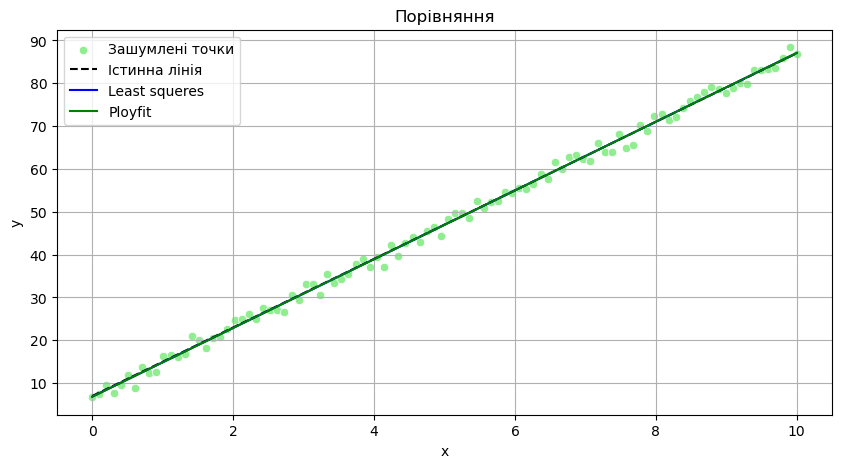

In [49]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x, y=y_e, label="Зашумлені точки", color="lightgreen")

plt.plot(x, y, label="Істинна лінія", color="black", linestyle="--")
plt.plot(x, b1_opt * x + b0_opt, label="Least squeres", color="blue")
plt.plot(x, b1_polyfit * x + b0_polyfit, label="Ployfit", color="green")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Порівняння")
plt.legend()
plt.grid(True)
plt.show()

**Завдання 2:**
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter
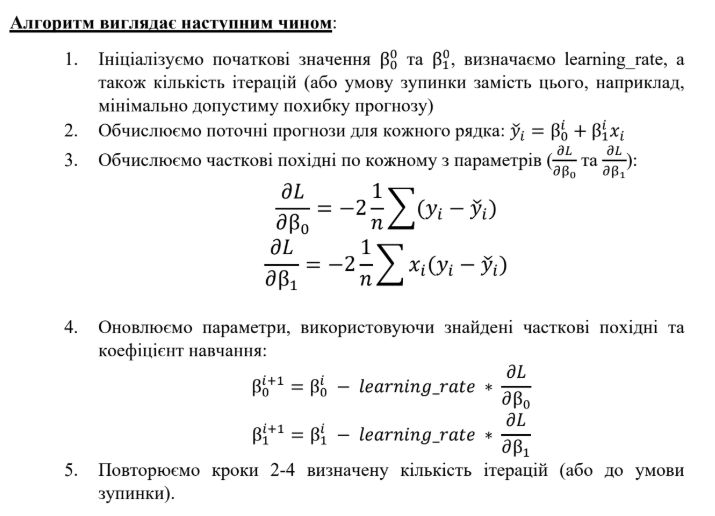

Коефіцієнт зсуву (b0) : 7
Коефіцієнт нахилу (b1) : 8

Оптимальний коефіцієнт зсуву (b0_opt) : 6.8358013784933505
Оптимальна коефіцієнт нахилу (b1_opt) : 8.023718264432663

polyfit - Оптимальний коефіцієнт зсуву: 6.835801378493356
polyfit - Оптимальний коефіцієнт нахилу: 8.023718264432665

Градієнтний спуск - Оптимальний коефіцієнт зсуву: 6.797821735310549
Градієнтний спуск - Оптимальний коефіцієнт нахилу: 8.029428890529358


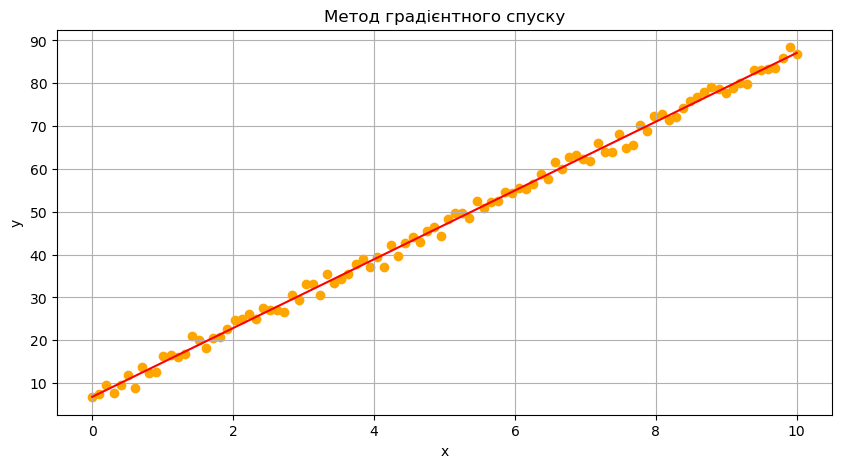

In [58]:
def gradient_descent(x, y, learning_rate=0.01, n_iter=1000):
    b0 = 0.0
    b1 = 0.0
    n = len(x)
    for _ in range(n_iter):
        y_predicted = b0 + b1 * x
        db0 = (-2 / n) * np.sum(y - y_predicted)
        db1 = (-2 / n) * np.sum(x * (y - y_predicted))
        b0 = b0 - learning_rate * db0
        b1 = b1 - learning_rate * db1
    return b0, b1

b0_grad, b1_grad = gradient_descent(x, y_e, learning_rate=0.01, n_iter=1000)
print(f"Коефіцієнт зсуву (b0) : {b0}")
print(f"Коефіцієнт нахилу (b1) : {b1}")

print(f"\nОптимальний коефіцієнт зсуву (b0_opt) : {b0_opt}")
print(f"Оптимальна коефіцієнт нахилу (b1_opt) : {b1_opt}")

print(f"\npolyfit - Оптимальний коефіцієнт зсуву: {b0_polyfit}")
print(f"polyfit - Оптимальний коефіцієнт нахилу: {b1_polyfit}")

print(f"\nГрадієнтний спуск - Оптимальний коефіцієнт зсуву: {b0_grad}")
print(f"Градієнтний спуск - Оптимальний коефіцієнт нахилу: {b1_grad}")

y_grad = b1_grad * x + b0_grad
plt.figure(figsize=(10, 5))
plt.scatter(x, y_e, color="orange")
plt.plot(x, y_grad, color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод градієнтного спуску")
plt.grid(True)
plt.show()

2. Додайте отриману лінію регресії на загальний графік.

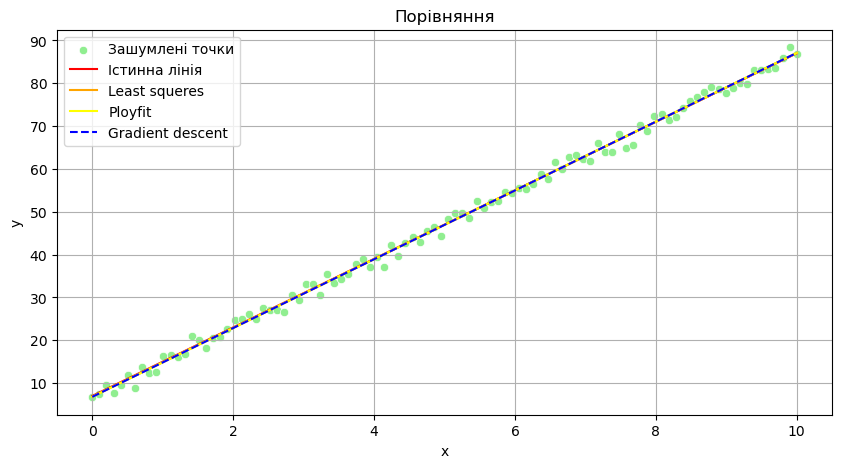

In [60]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=x, y=y_e, label="Зашумлені точки", color="lightgreen")

plt.plot(x, y, label="Істинна лінія", color="red")
plt.plot(x, b1_opt * x + b0_opt, label="Least squeres", color="orange")
plt.plot(x, b1_polyfit * x + b0_polyfit, label="Ployfit", color="yellow")
plt.plot(x, y_grad, label="Gradient descent", color="blue", linestyle="--")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Порівняння")
plt.legend()
plt.grid(True)
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки.
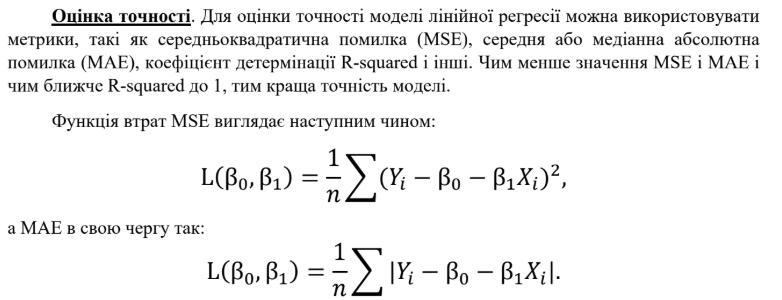

Errors: [8.667216802556029, 8.006975914009024, 7.41085256200693, 6.871082452094364, 6.382338350380269, 5.939796622756599, 5.539089627007118, 5.176262606593058, 4.847734659392363, 4.55026339617516, 4.2809129400144705, 4.03702495080391, 3.8161923889103333, 3.6162357590232346, 3.4351815997409187, 3.2712430065973, 3.1228019963026936, 2.988393538143131, 2.866691094937045, 2.7564935308466447, 2.6567132568311638, 2.566365496744215, 2.4845585681376487, 2.4104850818486785, 2.3434139735151684, 2.282683288374531, 2.2276936481361087, 2.177902335448821, 2.132817937580893, 2.0919954964478453, 2.055032117122195, 2.021562991483209, 1.9912577977624355, 1.9638174404504483, 1.9389710983895048, 1.9164735519184273, 1.8961027626901057, 1.8776576822757451, 1.8609562679280316, 1.8458336859198292, 1.8321406847264268, 1.8197421219954848, 1.8085156307667212, 1.7983504117776759]

Iterations: [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200,

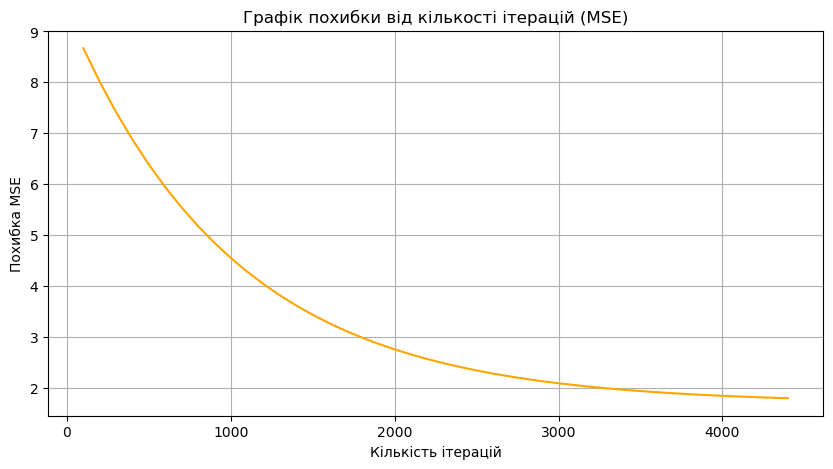

In [88]:
def MSE(x, y, dev=0.01,  learning_rate=0.01):
    errors = []
    interations = []
    for n_iter in range(100, 100000, 100):
        b0_grad, b1_grad = gradient_descent(x, y, learning_rate, n_iter)
        mse_error = np.sum((y - b0_grad - b1_grad * x) ** 2) / len(x)
        if (len(errors) != 0) and (abs(errors[-1] - mse_error) < dev):
            break
        errors.append(mse_error)
        interations.append(n_iter)
    return errors, interations

mse_err, mse_iterat = MSE(x, y_e, dev=0.01, learning_rate=0.001)
print(f"Errors: {mse_err}")
print(f"\nIterations: {mse_iterat}")

plt.figure(figsize=(10, 5))
plt.plot(mse_iterat, mse_err, color="orange")
plt.xlabel("Кількість ітерацій")
plt.ylabel("Похибка MSE")
plt.title("Графік похибки від кількості ітерацій (MSE)")
plt.grid(True)
plt.show()

Errors: [2.4133021151990888, 2.3205424430383346, 2.230601789980852, 2.146602735150955, 2.0678869425921707, 1.9959468978079866, 1.9290027249732618, 1.865876086804826, 1.8065861139540005, 1.7525071824651877, 1.7029953848683776, 1.6580061380818636, 1.6164568116163076, 1.5769201189392998, 1.5394170538664589, 1.503881025232105, 1.4700663484949856, 1.4384662566560815, 1.4099381075287363, 1.3842352923879002, 1.3597775119711821, 1.3369137905211994, 1.3171503752980305, 1.2983442924948776, 1.2813497402481857, 1.2666549671769278, 1.2526720034011283, 1.2402105496763232, 1.2287999452760034, 1.2179420662726372]

Iterations: [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000]


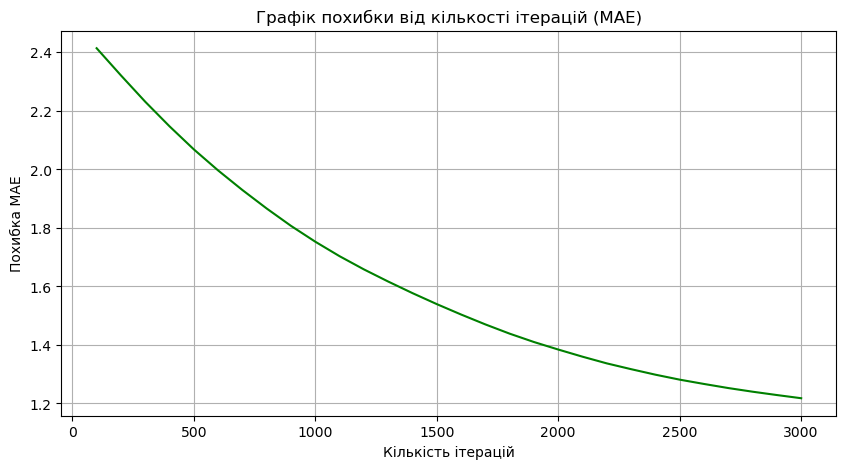

In [85]:
def MAE(x, y, dev=0.01, learning_rate=0.01):
    errors = []
    interations = []
    for n_iter in range(100, 100000, 100):
        b0_grad, b1_grad = gradient_descent(x, y, learning_rate, n_iter)
        mae_error = np.sum(np.abs(y - b0_grad - b1_grad * x)) / len(x)
        if (len(errors) != 0) and (abs(errors[-1] - mae_error) < dev):
            break
        errors.append(mae_error)
        interations.append(n_iter)
    return errors, interations

mae_err, mae_iterat = MAE(x, y_e, dev=0.01, learning_rate=0.001)
print(f"Errors: {mae_err}")
print(f"\nIterations: {mae_iterat}")

plt.figure(figsize=(10, 5))
plt.plot(mae_iterat, mae_err, color="green")
plt.xlabel("Кількість ітерацій")
plt.ylabel("Похибка MAE")
plt.title("Графік похибки від кількості ітерацій (MAE)")
plt.grid(True)
plt.show()

Висновок: обидві метрики поступово зменшуються зі збільшенням кількості ітерацій. MSE спадає  швидше, але з більшим коливанням, тоді як MAE зменшується більш плавно.

4. Порівняйте отримані результати з результатами попереднього завдання

In [91]:
print(f"Коефіцієнт зсуву (b0) : {b0}")
print(f"Коефіцієнт нахилу (b1) : {b1}")

print(f"\nМНК - Оптимальний коефіцієнт зсуву (b0) : {b0_opt}")
print(f"МНК - Оптимальна коефіцієнт нахилу (b1) : {b1_opt}")

print(f"\npolyfit - Оптимальний коефіцієнт зсуву (b0) : {b0_polyfit}")
print(f"polyfit - Оптимальний коефіцієнт нахилу (b1) : {b1_polyfit}")

print(f"\nГрадієнтний спуск - Оптимальний коефіцієнт зсуву (b0) : {b0_grad}")
print(f"Градієнтний спуск - Оптимальний коефіцієнт нахилу (b1) : {b1_grad}")

Коефіцієнт зсуву (b0) : 7
Коефіцієнт нахилу (b1) : 8

МНК - Оптимальний коефіцієнт зсуву (b0) : 6.8358013784933505
МНК - Оптимальна коефіцієнт нахилу (b1) : 8.023718264432663

polyfit - Оптимальний коефіцієнт зсуву (b0) : 6.835801378493356
polyfit - Оптимальний коефіцієнт нахилу (b1) : 8.023718264432665

Градієнтний спуск - Оптимальний коефіцієнт зсуву (b0) : 6.797821735310549
Градієнтний спуск - Оптимальний коефіцієнт нахилу (b1) : 8.029428890529358
